# Problema 2
Diseñe un programa que halle y muestre gráficamente todos los mínimos y máximos locales de la función

$$ y = x^5 - 8x^3 + 10x + 6 $$

y determine el mínimo y máximo global dentro del intervalo [-3, 3] usando Newton-Raphson.

## 1. Derivadas analíticas de la función
Para la función
$$ f(x) = x^5 - 8x^3 + 10x + 6 $$
Las derivadas son:
$$ f'(x) = 5x^4 - 24x^2 + 10 $$
$$ f''(x) = 20x^3 - 48x $$
Newton-Raphson busca raíces de $f'(x)=0$ para localizar puntos críticos. La segunda derivada $f''(x)$ permite clasificarlos: $f''>0$ mínimo local, $f''<0$ máximo local.


In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definición simbólica
x = sp.symbols('x')
f = x**5 - 8*x**3 + 10*x + 6
f_prime = sp.diff(f, x)
f_double_prime = sp.diff(f_prime, x)
print("f'(x) =", f_prime)
print("f''(x) =", f_double_prime)

# Método NR reutilizable
def newton_raphson_1d(f_expr, f_prime_expr, f_double_prime_expr, x0, alpha=1.0, tol=1e-6, max_iter=200):
    xi = float(x0)
    puntos = [xi]
    for i in range(1, max_iter + 1):
        grad_f_x = float(f_prime_expr.subs(x, xi))
        hess_f_xx = float(f_double_prime_expr.subs(x, xi))
        if abs(grad_f_x) < tol:
            break
        if hess_f_xx == 0:
            print("Hessiano nulo; se detiene.")
            break
        delta = grad_f_x / hess_f_xx
        xi -= alpha * delta
        puntos.append(xi)
        if abs(delta) < tol:
            break
    return xi, puntos

# Barrido de puntos iniciales en [-3,3]
x0_values = np.linspace(-3, 3, 13)
extremos = []  # (x0, x_star, iters, tipo)
for x0 in x0_values:
    x_star, pts = newton_raphson_1d(f, f_prime, f_double_prime, x0)
    iters = len(pts) - 1
    s2 = float(f_double_prime.subs(x, x_star))
    tipo = "mínimo" if s2 > 0 else ("máximo" if s2 < 0 else "indeterminado")
    extremos.append((float(x0), float(x_star), int(iters), tipo))

# Deduplicar puntos
round_decimals = 6
puntos_unicos = {}
for x0, xs, it, tp in extremos:
    key = round(xs, round_decimals)
    if key not in puntos_unicos or it < puntos_unicos[key]["iters"]:
        puntos_unicos[key] = {"x_star": key, "iters": it, "tipo": tp}
print("Puntos candidatos (únicos):")
for k, v in sorted(puntos_unicos.items()):
    print(f"  x* ≈ {k:.6f} ; tipo: {v['tipo']} ; iters: {v['iters']}")

criticos_x = np.array([v["x_star"] for v in puntos_unicos.values()], dtype=float)
criticos_tipo = [v["tipo"] for v in puntos_unicos.values()]

f'(x) = 5*x**4 - 24*x**2 + 10
f''(x) = 20*x**3 - 48*x
Hessiano nulo; se detiene.
Puntos candidatos (únicos):
  x* ≈ -2.083044 ; tipo: máximo ; iters: 4
  x* ≈ -0.678917 ; tipo: mínimo ; iters: 3
  x* ≈ 0.000000 ; tipo: indeterminado ; iters: 0
  x* ≈ 0.678917 ; tipo: máximo ; iters: 3
  x* ≈ 2.083044 ; tipo: mínimo ; iters: 4


## 2. Aplicación de Newton-Raphson desde múltiples puntos iniciales
Se usa un conjunto de puntos iniciales uniformemente espaciados en [-3,3] para explorar todas las posibles raíces de $f'(x)$ que caen dentro del intervalo. Cada ejecución del método puede converger a un distinto extremo local dependiendo de la cuenca de atracción.


Máximos locales: [np.float64(-2.083044), np.float64(0.678917)]
Mínimos locales: [np.float64(2.083044), np.float64(-0.678917)]
Máximo global (en [-3,3]) en x = 3.000000, f(x) = 63.000000
Mínimo global (en [-3,3]) en x = -3.000000, f(x) = -51.000000


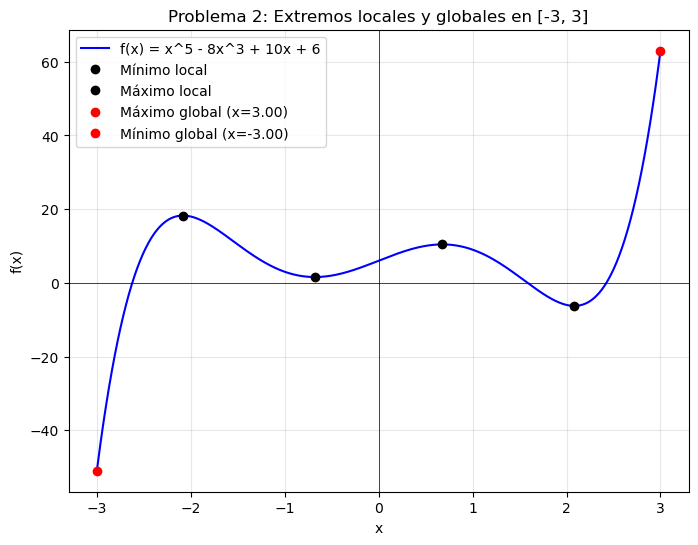

Resumen por tipo:
  mínimo: 30
  máximo: 30
  indeterminado: 1

Basins de atracción (x* redondeado):
  x* ≈ -2.083044 -> tipo: máximo, ocurrencias: 18, iters (min/mean/max): 3/5.22/9, rango x0: [-3.0, 1.5]
  x* ≈ -0.678917 -> tipo: mínimo, ocurrencias: 12, iters (min/mean/max): 2/3.50/5, rango x0: [-1.3, -0.2]
  x* ≈ 0.000000 -> tipo: indeterminado, ocurrencias: 1, iters (min/mean/max): 0/0.00/0, rango x0: [0.0, 0.0]
  x* ≈ 0.678917 -> tipo: máximo, ocurrencias: 12, iters (min/mean/max): 2/3.50/5, rango x0: [0.2, 1.3]
  x* ≈ 2.083044 -> tipo: mínimo, ocurrencias: 18, iters (min/mean/max): 3/5.22/9, rango x0: [-1.5, 3.0]

Estadísticas globales de iteraciones:
  min: 0  mean: 4.46  median: 4.00  max: 9


In [2]:
# Clasificación de extremos y determinación de globales
local_min = [xv for xv, tp in zip(criticos_x, criticos_tipo) if tp == "mínimo"]
local_max = [xv for xv, tp in zip(criticos_x, criticos_tipo) if tp == "máximo"]
f_l = sp.lambdify(x, f, 'numpy')
candidatos = list(criticos_x) + [-3.0, 3.0]
vals = [float(f_l(c)) for c in candidatos]
idx_max = int(np.argmax(vals))
idx_min = int(np.argmin(vals))
x_global_max = candidatos[idx_max]
x_global_min = candidatos[idx_min]
print("Máximos locales:", local_max)
print("Mínimos locales:", local_min)
print(f"Máximo global (en [-3,3]) en x = {x_global_max:.6f}, f(x) = {f_l(x_global_max):.6f}")
print(f"Mínimo global (en [-3,3]) en x = {x_global_min:.6f}, f(x) = {f_l(x_global_min):.6f}")

# Gráfica de la función y extremos
X = np.linspace(-3, 3, 600)
Y = f_l(X)
plt.figure(figsize=(8, 6))
plt.plot(X, Y, color='blue', label='f(x) = x^5 - 8x^3 + 10x + 6')
for xv in local_min:
    plt.plot(xv, f_l(xv), 'ko', label='Mínimo local' if 'Mínimo local' not in plt.gca().get_legend_handles_labels()[1] else '')
for xv in local_max:
    plt.plot(xv, f_l(xv), 'ko', label='Máximo local' if 'Máximo local' not in plt.gca().get_legend_handles_labels()[1] else '')
plt.plot(x_global_max, f_l(x_global_max), 'ro', label=f"Máximo global (x={x_global_max:.2f})")
plt.plot(x_global_min, f_l(x_global_min), 'ro', label=f"Mínimo global (x={x_global_min:.2f})")
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.title('Problema 2: Extremos locales y globales en [-3, 3]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Análisis de convergencia detallado
from collections import defaultdict, Counter
import contextlib, io
alpha_eval = 1.0
x0_values = np.linspace(-3, 3, 61)
resultados_conv = []
for x0 in x0_values:
    buf = io.StringIO()
    with contextlib.redirect_stdout(buf):
        x_star, pts = newton_raphson_1d(f, f_prime, f_double_prime, float(x0), alpha=alpha_eval)
    iters = len(pts) - 1
    s2 = float(f_double_prime.subs(x, x_star))
    tipo = "mínimo" if s2 > 0 else ("máximo" if s2 < 0 else "indeterminado")
    resultados_conv.append((float(x0), float(x_star), int(iters), tipo))
count_by_type = Counter([t for (_, _, _, t) in resultados_conv])
print("Resumen por tipo:")
for k in ["mínimo", "máximo", "indeterminado"]:
    print(f"  {k}: {count_by_type.get(k, 0)}")
round_decimals = 6
basins = defaultdict(lambda: {"x0s": [], "iters": [], "tipo": None})
for x0, xs, it, tp in resultados_conv:
    key = round(xs, round_decimals)
    basins[key]["x0s"].append(x0)
    basins[key]["iters"].append(it)
    basins[key]["tipo"] = tp
print("\nBasins de atracción (x* redondeado):")
for xs_key in sorted(basins.keys()):
    info = basins[xs_key]
    x0s_sorted = sorted(info["x0s"])
    rango = (x0s_sorted[0], x0s_sorted[-1]) if x0s_sorted else (None, None)
    print(f"  x* ≈ {xs_key:.6f} -> tipo: {info['tipo']}, ocurrencias: {len(info['x0s'])}, iters (min/mean/max): {np.min(info['iters'])}/{np.mean(info['iters']):.2f}/{np.max(info['iters'])}, rango x0: [{rango[0]:.1f}, {rango[1]:.1f}]")
all_iters = np.array([it for (_, _, it, _) in resultados_conv], dtype=int)
print("\nEstadísticas globales de iteraciones:")
print(f"  min: {all_iters.min()}  mean: {all_iters.mean():.2f}  median: {np.median(all_iters):.2f}  max: {all_iters.max()}")

## 3. Clasificación de puntos críticos
Una vez hallados los candidatos $x^*$ se evalúa $f''(x^*)$ para determinar si el punto es un mínimo ($f''>0$) o un máximo ($f''<0$). Si $f''(x^*)=0$ la prueba es inconclusa y se requiere análisis adicional.


In [3]:
# 3. Clasificación de puntos críticos
local_min = [xv for xv, tp in zip(criticos_x, criticos_tipo) if tp == "mínimo"]
local_max = [xv for xv, tp in zip(criticos_x, criticos_tipo) if tp == "máximo"]
print("Máximos locales:", local_max)
print("Mínimos locales:", local_min)


Máximos locales: [np.float64(-2.083044), np.float64(0.678917)]
Mínimos locales: [np.float64(2.083044), np.float64(-0.678917)]


## 4. Identificación de extremos globales
Se evalúa la función en los puntos críticos obtenidos y en los extremos del intervalo [-3,3]. El mayor valor determina el máximo global restringido al intervalo y el menor valor determina el mínimo global.


In [4]:
# 4. Identificación de extremos globales en [-3,3]
f_l = sp.lambdify(x, f, 'numpy')
candidatos = list(criticos_x) + [-3.0, 3.0]
vals = [float(f_l(c)) for c in candidatos]
idx_max = int(np.argmax(vals))
idx_min = int(np.argmin(vals))
x_global_max = candidatos[idx_max]
x_global_min = candidatos[idx_min]
print(f"Máximo global (en [-3,3]) en x = {x_global_max:.6f}, f(x) = {f_l(x_global_max):.6f}")
print(f"Mínimo global (en [-3,3]) en x = {x_global_min:.6f}, f(x) = {f_l(x_global_min):.6f}")


Máximo global (en [-3,3]) en x = 3.000000, f(x) = 63.000000
Mínimo global (en [-3,3]) en x = -3.000000, f(x) = -51.000000


## 5. Visualización de la función y extremos
Se grafica la función en el intervalo [-3,3]. Los extremos locales se marcan en negro y los globales (máximo y mínimo) se resaltan en rojo para facilitar su identificación visual.


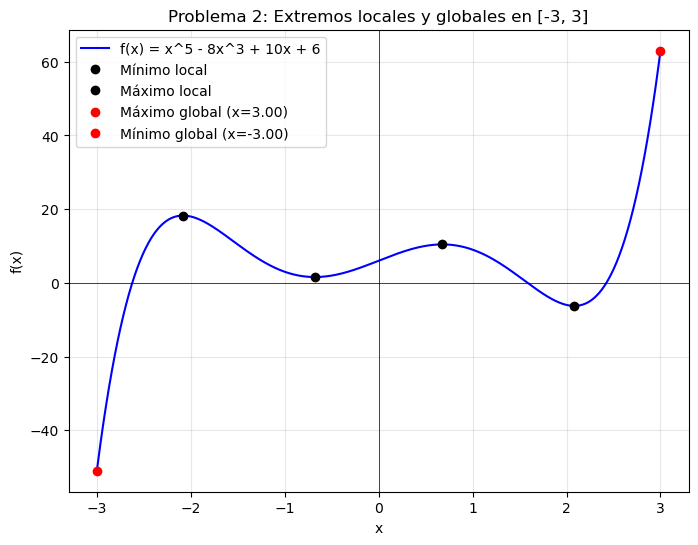

In [5]:
# 5. Gráfica de función con extremos locales (negro) y globales (rojo)
X = np.linspace(-3, 3, 600)
Y = f_l(X)
plt.figure(figsize=(8, 6))
plt.plot(X, Y, color='blue', label='f(x) = x^5 - 8x^3 + 10x + 6')
for xv in local_min:
    plt.plot(xv, f_l(xv), 'ko', label='Mínimo local' if 'Mínimo local' not in plt.gca().get_legend_handles_labels()[1] else '')
for xv in local_max:
    plt.plot(xv, f_l(xv), 'ko', label='Máximo local' if 'Máximo local' not in plt.gca().get_legend_handles_labels()[1] else '')
plt.plot(x_global_max, f_l(x_global_max), 'ro', label=f"Máximo global (x={x_global_max:.2f})")
plt.plot(x_global_min, f_l(x_global_min), 'ro', label=f"Mínimo global (x={x_global_min:.2f})")
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.title('Problema 2: Extremos locales y globales en [-3, 3]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


## 6. Análisis de convergencia del método
Se realiza un barrido fino de valores iniciales $x_0$ y se agrupan los resultados por el punto de convergencia redondeado, generando cuencas de atracción y estadísticas (mínimo, máximo, promedio de iteraciones). Esto permite evaluar la eficiencia y robustez de Newton-Raphson para esta función polinómica de grado 5.


In [6]:
# 6. Análisis de convergencia: cuencas y estadísticas
from collections import defaultdict, Counter
import contextlib, io
alpha_eval = 1.0
x0_values = np.linspace(-3, 3, 61)
resultados_conv = []
for x0 in x0_values:
    buf = io.StringIO()
    with contextlib.redirect_stdout(buf):
        x_star, pts = newton_raphson_1d(f, f_prime, f_double_prime, float(x0), alpha=alpha_eval)
    iters = len(pts) - 1
    s2 = float(f_double_prime.subs(x, x_star))
    tipo = "mínimo" if s2 > 0 else ("máximo" if s2 < 0 else "indeterminado")
    resultados_conv.append((float(x0), float(x_star), int(iters), tipo))
count_by_type = Counter([t for (_, _, _, t) in resultados_conv])
print("Resumen por tipo:")
for k in ["mínimo", "máximo", "indeterminado"]:
    print(f"  {k}: {count_by_type.get(k, 0)}")
round_decimals = 6
basins = defaultdict(lambda: {"x0s": [], "iters": [], "tipo": None})
for x0, xs, it, tp in resultados_conv:
    key = round(xs, round_decimals)
    basins[key]["x0s"].append(x0)
    basins[key]["iters"].append(it)
    basins[key]["tipo"] = tp
print("\nBasins de atracción (x* redondeado):")
for xs_key in sorted(basins.keys()):
    info = basins[xs_key]
    x0s_sorted = sorted(info["x0s"])
    rango = (x0s_sorted[0], x0s_sorted[-1]) if x0s_sorted else (None, None)
    print(f"  x* ≈ {xs_key:.6f} -> tipo: {info['tipo']}, ocurrencias: {len(info['x0s'])}, iters (min/mean/max): {np.min(info['iters'])}/{np.mean(info['iters']):.2f}/{np.max(info['iters'])}, rango x0: [{rango[0]:.1f}, {rango[1]:.1f}]")
all_iters = np.array([it for (_, _, it, _) in resultados_conv], dtype=int)
print("\nEstadísticas globales de iteraciones:")
print(f"  min: {all_iters.min()}  mean: {all_iters.mean():.2f}  median: {np.median(all_iters):.2f}  max: {all_iters.max()}")


Resumen por tipo:
  mínimo: 30
  máximo: 30
  indeterminado: 1

Basins de atracción (x* redondeado):
  x* ≈ -2.083044 -> tipo: máximo, ocurrencias: 18, iters (min/mean/max): 3/5.22/9, rango x0: [-3.0, 1.5]
  x* ≈ -0.678917 -> tipo: mínimo, ocurrencias: 12, iters (min/mean/max): 2/3.50/5, rango x0: [-1.3, -0.2]
  x* ≈ 0.000000 -> tipo: indeterminado, ocurrencias: 1, iters (min/mean/max): 0/0.00/0, rango x0: [0.0, 0.0]
  x* ≈ 0.678917 -> tipo: máximo, ocurrencias: 12, iters (min/mean/max): 2/3.50/5, rango x0: [0.2, 1.3]
  x* ≈ 2.083044 -> tipo: mínimo, ocurrencias: 18, iters (min/mean/max): 3/5.22/9, rango x0: [-1.5, 3.0]

Estadísticas globales de iteraciones:
  min: 0  mean: 4.46  median: 4.00  max: 9
